In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def GaussainKernel(ksize, sigma):        
    # Calculate center index of kernel
    k = ksize // 2
    
    # Generate array with evenly spaced values within range of [-k, k]
    s = np.arange(-k, k + 1)
    
    # Calculate Gaussian kernel values based on given standard deviation (sigma)
    kernel = np.exp(-0.5 * (s / sigma) ** 2)
    
    # Normalize kernel to ensure sum of all values is 1
    kernel /= kernel.sum()
    
    return kernel

def GaussianBlurfromScratch(image, ksize, sigma):
    # Ensure kernel size is valid (positive and odd)
    assert ksize > 0 and ksize % 2 == 1

    # If sigma is not provided or invalid, compute a default value based on kernel size
    if not sigma or sigma <= 0:
        sigma = ((ksize - 1) - 1) * 0.5 * 0.3 + 0.8
    
    # Generate 1D Gaussian kernel
    kernel = GaussainKernel(ksize, sigma)

    # Empty array to store the blurred image
    blurred_image = np.zeros_like(image, dtype=float)
            
    # Apply convolution along each row of image using Gaussian kernel
    blurred_image = np.apply_along_axis(lambda x: np.convolve(x, kernel, mode='fill'), axis=1, arr=image)
    
    # Apply convolution along each column of resulting image using Gaussian kernel
    blurred_image = np.apply_along_axis(lambda x: np.convolve(x, kernel, mode='fill'), axis=0, arr=blurred_image)
    
    return np.uint8(blurred_image)



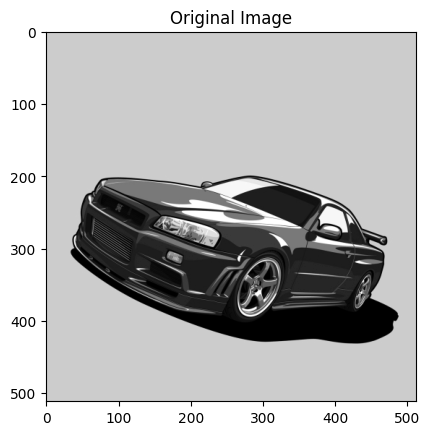

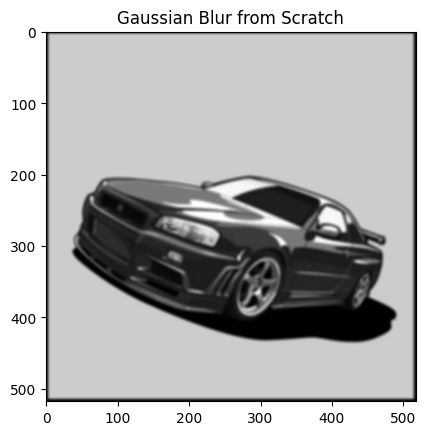

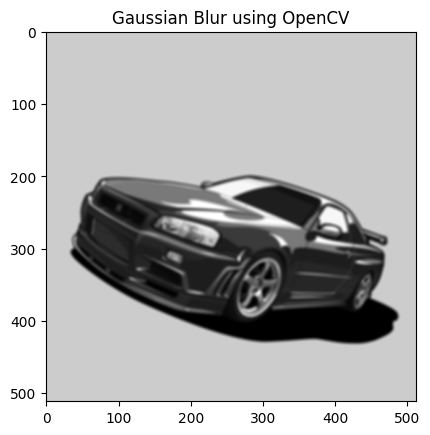

In [ ]:
image = cv2.imread("./InputImages/smoothing_car.jpg", cv2.IMREAD_GRAYSCALE)

gaussiansmoothing_fromscratch = GaussianBlurfromScratch(image, 7, 2) 

opencv_gaussianblur = cv2.GaussianBlur(image, (7, 7), 2)

plt.title("Original Image Greyscale")
plt.imshow(image, cmap='gray')
plt.show()

plt.title("Gaussian Blur from Scratch")
plt.imshow(gaussiansmoothing_fromscratch, cmap='gray')
plt.show()

plt.title("Gaussian Blur using OpenCV")
plt.imshow(opencv_gaussianblur, cmap='gray')
plt.show()
